# Identificando e removendo outliers

In [9]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
dados = pd.read_csv("https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/latest/owid-covid-latest.csv")
dados.head()

,iso_code,continent,location,last_updated_date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2023-09-06,225357.0,0.0,19.0,7944.0,0.0,0.0,...,NaN,37.746,0.50,64.83,0.511,4.112877e+07,NaN,NaN,NaN,NaN
1,OWID_AFR,NaN,Africa,2023-09-06,13106812.0,0.0,45.0,259008.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,1.426737e+09,NaN,NaN,NaN,NaN
2,ALB,Europe,Albania,2023-09-06,334090.0,0.0,0.0,3604.0,0.0,0.0,...,51.2,NaN,2.89,78.57,0.795,2.842318e+06,NaN,NaN,NaN,NaN
3,DZA,Africa,Algeria,2023-09-06,271852.0,0.0,0.0,6881.0,0.0,0.0,...,30.4,83.741,1.90,76.88,0.748,4.490323e+07,NaN,NaN,NaN,NaN
4,ASM,Oceania,American Samoa,2023-09-06,8341.0,0.0,0.0,34.0,0.0,0.0,...,NaN,NaN,NaN,73.74,NaN,4.429500e+04,NaN,NaN,NaN,NaN


## Removendo valores nulos

In [11]:
dados_nulos_drop = dados.isnull().sum() > 200
dados_nulos_drop = dados_nulos_drop.loc[dados_nulos_drop == True]
for colunas in dados_nulos_drop.index:
  dados.drop(colunas,axis=1,inplace=True)

In [12]:
colunas_numericas = dados.select_dtypes('float')
colunas_numericas

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,...,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population
0,225357.0,0.0,19.000,7944.0,0.0,0.000,5479.303,0.0,0.462,193.149,...,NaN,597.029,9.59,NaN,NaN,37.746,0.500,64.83,0.511,4.112877e+07
1,13106812.0,0.0,45.000,259008.0,0.0,0.000,9186.567,0.0,0.032,181.539,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.426737e+09
2,334090.0,0.0,0.000,3604.0,0.0,0.000,117541.387,0.0,0.000,1267.979,...,1.1,304.195,10.08,7.100,51.200,NaN,2.890,78.57,0.795,2.842318e+06
3,271852.0,0.0,0.000,6881.0,0.0,0.000,6054.175,0.0,0.000,153.241,...,0.5,278.364,6.73,0.700,30.400,83.741,1.900,76.88,0.748,4.490323e+07
4,8341.0,0.0,0.000,34.0,0.0,0.000,188305.678,0.0,0.000,767.581,...,NaN,283.750,NaN,NaN,NaN,NaN,NaN,73.74,NaN,4.429500e+04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246,3550.0,0.0,0.000,8.0,0.0,0.000,306140.048,0.0,0.000,689.893,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,79.94,NaN,1.159600e+04
247,770436563.0,0.0,2289.000,6956887.0,0.0,21.857,96605.193,0.0,0.287,872.325,...,10.0,233.070,8.51,6.434,34.635,60.130,2.705,72.58,0.737,7.975105e+09
248,11945.0,0.0,0.000,2159.0,0.0,0.000,354.487,0.0,0.000,64.072,...,18.8,495.003,5.35,7.600,29.200,49.542,0.700,66.12,0.470,3.369661e+07
249,349287.0,0.0,0.000,4069.0,0.0,0.000,17448.934,0.0,0.000,203.270,...,57.5,234.499,3.94,3.100,24.700,13.938,2.000,63.89,0.584,2.001767e+07


In [13]:
primeiro_quartil = colunas_numericas.quantile(0.25)
terceiro_quartil = colunas_numericas.quantile(0.75)
distancia = terceiro_quartil - primeiro_quartil
limite_superiror = terceiro_quartil + 1.5 * distancia
limite_inferiror = primeiro_quartil - 1.5 * distancia

In [40]:
outliers = limite_superiror > colunas_numericas
(outliers == True).sum()

total_cases                          0
new_cases                            0
new_cases_smoothed                   3
total_deaths                         0
new_deaths                           0
new_deaths_smoothed                  6
total_cases_per_million              0
new_cases_per_million                0
new_cases_smoothed_per_million      17
total_deaths_per_million             0
new_deaths_per_million               4
new_deaths_smoothed_per_million     18
population_density                   1
median_age                           0
aged_65_older                        0
aged_70_older                        2
gdp_per_capita                       0
extreme_poverty                     39
cardiovasc_death_rate                0
diabetes_prevalence                  1
female_smokers                      18
male_smokers                         0
handwashing_facilities               0
hospital_beds_per_thousand          30
life_expectancy                      0
human_development_index  

In [48]:
lista_outliers = outliers.sum() > 0
lista_outliers = lista_outliers.loc[lista_outliers == True]
lista_outliers

new_cases_smoothed                 True
new_deaths_smoothed                True
new_cases_smoothed_per_million     True
new_deaths_per_million             True
new_deaths_smoothed_per_million    True
population_density                 True
aged_70_older                      True
extreme_poverty                    True
diabetes_prevalence                True
female_smokers                     True
hospital_beds_per_thousand         True
human_development_index            True
dtype: bool

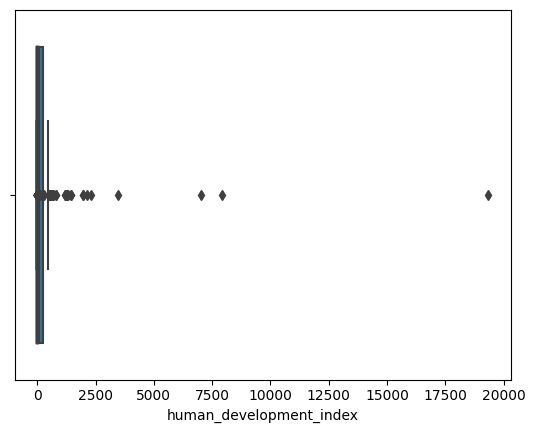

In [90]:
for c in lista_outliers.index:
  sns.boxplot(
      data=dados,
      x = colunas_numericas[c]
  )